In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [108]:
data = pd.read_csv('data job posts.csv')
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

#### Data Exploration

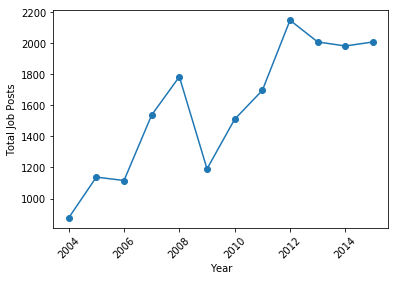

In [110]:
df1 = data.groupby(by=['Year'])[['jobpost']].count().reset_index()
plt.plot(df1['Year'],df1['jobpost'],marker='o')
plt.xlabel('Year')
plt.ylabel('Total Job Posts')
plt.xticks(rotation=45)
plt.show()

The number of job posts show increasing trend over the years.
There is slight dip in 2009 because of recession in 2008.

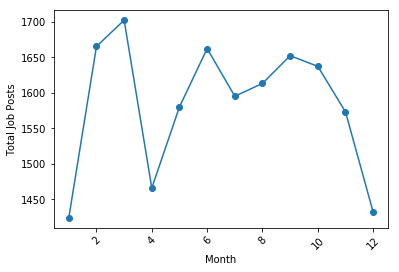

In [111]:
df2 = data.groupby(by=['Month'])[['jobpost']].count().reset_index()
plt.plot(df2['Month'],df2['jobpost'],marker='o')
plt.xlabel('Month')
plt.ylabel('Total Job Posts')
plt.xticks(rotation=45)
plt.show()

The number of jobs tends to be more in the months of March and June. Jobs are less in the month of December and January.

C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  if __name__ == '__main__':


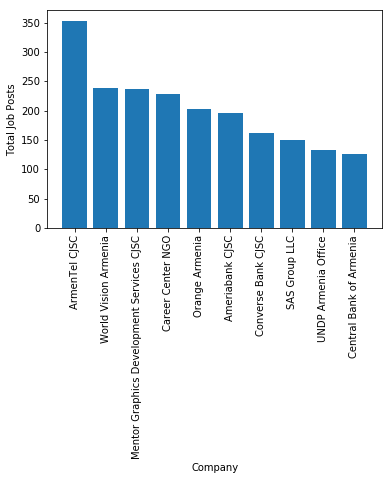

In [112]:
df3 = data.groupby(by=['Company'])[['jobpost']].count().reset_index().sort_index(by=['jobpost'],ascending=False).head(10)
plt.bar(df3['Company'],df3['jobpost'])
plt.xlabel('Company')
plt.ylabel('Total Job Posts')
plt.xticks(rotation=90)
plt.show()

These are the top 10 companies who had most number of job postings during this span.

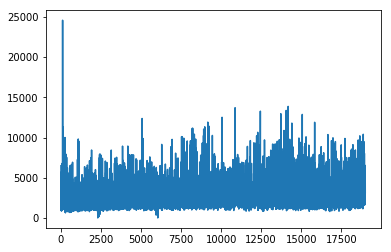

In [113]:
data['length_jobpost'] = data.jobpost.apply(lambda x: len(x))
plt.plot(data.index, data.length_jobpost)
plt.show()

In [114]:
data.sort_values('length_jobpost',ascending=False)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT,length_jobpost
105,"USAID, DCHA and LWVF\r\nTITLE: Annual Progra...","Mar 4, 2004",Annual Program Statement: Implementation and E...,"USAID, DCHA and LWVF",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10 page maximum \r\nSuggested Outline for Appl...,2004,3,False,24586
14186,UNIDO - United Nations Industrial Development ...,"Jul 29, 2013",National Project Coordinator (NPC),UNIDO - United Nations Industrial Development ...,NaN,Full-time,NaN,NaN,01 September 2013,"3 years (initial contract duration of 1 year, ...",...,Interested candidates can apply through:https:...,29 July 2013,16 August 2013,Position requires travel within Armenia.,UNIDO is the specialized agency of the United ...,The following attachment(s) to this announceme...,2013,7,False,13881
10873,Save the Children Federation Inc. Armenia Coun...,"Jan 11, 2012",Senior Manager of Support Services,Save the Children Federation Inc. Armenia Coun...,NaN,NaN,NaN,NaN,01 March 2012,NaN,...,"To apply, please email your CV along with a\r\...",12 January 2012,26 January 2012,NaN,Save the Children's mission is to inspire brea...,NaN,2012,1,False,13716
14060,World Vision Armenia\r\nTITLE: Program Direct...,"Jul 3, 2013",Program Director - Armenia,World Vision Armenia,NaN,NaN,NaN,NaN,01 October 2013,"3 year employment (end date on 30 September, 2...",...,"If you are interested to apply, please send a\...",03 July 2013,16 July 2013,NaN,World Vision started work in Armenia in 1988 f...,NaN,2013,7,False,13378
12450,UNDP Armenia Office\r\nTITLE: Finance Officer...,"Sep 27, 2012",Finance Officer for MBBG Project,UNDP Armenia Office,NaN,NaN,NaN,NaN,NaN,NaN,...,Applications shall be submitted online through...,28 September 2012,11 October 2012\r\nABOUT: \r\nAbout Project:\...,NaN,NaN,The following attachment(s) to this announceme...,2012,9,False,13289
12446,UNDP Armenia Office\r\nTITLE: Expert on IT an...,"Sep 27, 2012",Expert on IT and Security Systems for MBBG Pro...,UNDP Armenia Office,NaN,NaN,NaN,NaN,NaN,NaN,...,Applications shall be submitted online through...,27 September 2012,11 October 2012,NaN,NaN,The following attachment(s) to this announceme...,2012,9,False,13049
13726,The World Bank\r\nTITLE: Executive Assistant\...,"May 2, 2013",Executive Assistant,The World Bank,131090,Renewable Term Appointment,All qualified candidates,NaN,NaN,2 years,...,Interested candidates are invited to apply\r\n...,02 May 2013,21 May 2013,The World Bank Group is committed to achieving...,Regional Context:\r\nThe Europe and Central As...,The following attachment(s) to this announceme...,2013,5,False,12977
15067,World Vision Georgia\r\nTITLE: Program Direct...,"Jan 16, 2014",Program Director,World Vision Georgia,NaN,NaN,This position is open for citizens of\r\nSouth...,NaN,01 February 2014,01 February 2014 - 31 January 2017,...,Interested candidates are asked to apply by\r\...,16 January 2014,29 January 2014,NaN,World Vision International has been operating ...,NaN,2014,1,False,12885
10060,UNHCR Armenia Office\r\nTITLE: United Nations...,"Jul 12, 2011",United Nations Volunteer- Admin/ Programme Ass...,UNHCR Armenia Office,NaN,NaN,NaN,NaN,Immediately,Until 31 December 2011 with the possibility of...,...,Applications shall be submitted online through...,12 July 2011,20 July 2011,The United Nations Volunteers (UNV) programme ...,The UNHCR office is located in the common UN B...,NaN,2011,7,False,12528
5069,OSCE Office in Yerevan\r\nTITLE: Consultant(s...,"Mar 21, 2008",Consultant(s) to Develop Anti-Trafficking Trai...,OSCE Office in Yerevan,NaN,NaN,NaN,NaN,NaN,4 months (with a possibility to be extended),...,Applications can be submitted:\r\nthrough http...,21 March 2008,04 April 2008\r\nABOUT: Projects:\r\nUNDP: An...,NaN,NaN,NaN,2008,3,False,12382


In [115]:
print(data.iloc[105].Title)

Annual Program Statement: Implementation and Extension of


Job post with title 'Annual Program Statement: Implementation and Extension of' has the most length

#### Data Preperation

In [116]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT', 'length_jobpost'],
      dtype='object')

In [117]:
cols = ['jobpost',
       'Title',
       'JobRequirment',
       'JobDescription',
       'RequiredQual',
       'AboutC',
       'IT',
       'Year']

The above columns are used for analysis

##### Data Cleaning

In [118]:
df = data[cols]
df = df.drop_duplicates(subset=['jobpost','Title'],keep='first')
df.shape

(18892, 8)

After identifying the duplicate rows based on 'jobpost' and 'Title' 109 rows were removed.

###### Removal of Newlines and single Quotes

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18892 entries, 0 to 19000
Data columns (total 8 columns):
jobpost           18892 non-null object
Title             18865 non-null object
JobRequirment     16429 non-null object
JobDescription    15059 non-null object
RequiredQual      18458 non-null object
AboutC            12377 non-null object
IT                18892 non-null bool
Year              18892 non-null int64
dtypes: bool(1), int64(1), object(6)
memory usage: 1.2+ MB


In [120]:
def cleanText(doc):
    doc = doc.replace("\n"," ")
    doc = doc.replace("'","")
    return(doc)

In [121]:
for col in df.columns.difference(['Year','IT']):
    df[col] = df[col].fillna("")
df.head()

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\r\nJOB TI...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r\nindivi...",,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,,,- Bachelor's Degree; Master's is preferred;\r\...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\r\...,False,2004
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",,False,2004
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,Software Developer,- Rendering technical assistance to Database M...,,- University degree; economical background is ...,,True,2004


In [122]:
for col in df.columns.difference(['Year','IT']):
    df[col] = df[col].apply(lambda x: cleanText(x))
df

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\r JOB TIT...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r individ...",,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,,,- Bachelors Degree; Masters is preferred;\r - ...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\r JO...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\r ...,False,2004
3,Manoff Group\r JOB TITLE: BCC Specialist\r PO...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",,False,2004
4,Yerevan Brandy Company\r JOB TITLE: Software ...,Software Developer,- Rendering technical assistance to Database M...,,- University degree; economical background is ...,,True,2004
5,"Boutique ""Appollo""\r JOB TITLE: Saleswoman\r ...",Saleswoman,,Saleswoman will sell menswear and accessories.,"- Candidates should be female, 20-30 years old...",,False,2004
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,,The Armenian Branch Office of the Open Society...,- University degree in finance/ accounting; \r...,,False,2004
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,,,,The International Research & Exchanges Board (...,False,2004
8,Yerevan Brandy Company \r JOB TITLE: Assistan...,Assistant to Managing Director,- Coordinating the work of subordinate employe...,,- University degree;\r - At least 3 years of e...,,False,2004
9,American Embassy Yerevan\r ANNOUNCEMENT NUMBER...,"Program Assistant (INL), FSN-8; FP-6*",,The incumbent assists in coordinating INL-fund...,NOTE: All applicants are instructed to\r addre...,,False,2004


##### Removal of Emails, Web Address and Telephone numbers

In [123]:
sample = 'devarun07@gmail.com is my email id a@a.edu, Thank You!'
re.sub(r"\S*@\S*\s?", "", sample)

'is my email id Thank You!'

In [124]:
web_links = df.jobpost.str.contains(r"https?:")
df[web_links].jobpost.str.findall(r"https?:[^ \n\)]+").head()

16                                  [http://www.soc.nu]
17               [http://oc.undp.am, http://oc.undp.am]
38    [http://www.ijp.org/english/fellowships/navig/...
66                                  [http://oc.undp.am]
68    [http://www.careercenter.am/internships/Attach...
Name: jobpost, dtype: object

In [125]:
web_links = df.jobpost.str.contains(r"www.")
df[web_links].jobpost.str.findall(r"www.[^ \n\)]+").head()

0    [www.careercenter.am,]
1    [www.careercenter.am,]
2    [www.careercenter.am,]
3    [www.careercenter.am,]
4    [www.careercenter.am,]
Name: jobpost, dtype: object

In [126]:
ph_num = df.jobpost.str.contains(r"\d")
df[ph_num].jobpost.str.findall(r"\d").head()

0    [5, 7, 3, 7, 4, 1, 5, 4, 6, 8, 0, 0, 3, 7, 4, ...
1    [3, 5, 0, 2, 3, 7, 5, 0, 1, 0, 1, 2, 2, 0, 0, ...
2        [5, 2, 0, 2, 0, 0, 4, 2, 0, 0, 4, 1, 9, 9, 8]
3                                   [2, 3, 2, 0, 0, 4]
4    [2, 0, 0, 0, 2, 0, 0, 0, 6, 2, 2, 1, 3, 4, 2, ...
Name: jobpost, dtype: object

In [127]:
def removeEmailWebPhone(doc):
    doc = re.sub(r"\S*@\S*\s?", "", doc)
    doc = re.sub(r"www.[^ \n\)]+", "", doc)
    doc = re.sub(r"\d", "", doc)
    return doc

In [128]:
for col in df.columns.difference(['Year','IT']):
    df[col] = df[col].apply(lambda x: removeEmailWebPhone(x))
df

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\r JOB TIT...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\r individ...",,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,,,- Bachelors Degree; Masters is preferred;\r - ...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\r JO...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\r ...,False,2004
3,Manoff Group\r JOB TITLE: BCC Specialist\r PO...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",,False,2004
4,Yerevan Brandy Company\r JOB TITLE: Software ...,Software Developer,- Rendering technical assistance to Database M...,,- University degree; economical background is ...,,True,2004
5,"Boutique ""Appollo""\r JOB TITLE: Saleswoman\r ...",Saleswoman,,Saleswoman will sell menswear and accessories.,"- Candidates should be female, - years old;\r ...",,False,2004
6,OSI Assistance Foundation - Armenian Branch Of...,Chief Accountant/ Finance Assistant,,The Armenian Branch Office of the Open Society...,- University degree in finance/ accounting; \r...,,False,2004
7,International Research & Exchanges Board (IREX...,Non-paid part or full time Programmatic Intern,,,,The International Research & Exchanges Board (...,False,2004
8,Yerevan Brandy Company \r JOB TITLE: Assistan...,Assistant to Managing Director,- Coordinating the work of subordinate employe...,,- University degree;\r - At least years of ex...,,False,2004
9,American Embassy Yerevan\r ANNOUNCEMENT NUMBER...,"Program Assistant (INL), FSN-; FP-*",,The incumbent assists in coordinating INL-fund...,NOTE: All applicants are instructed to\r addre...,,False,2004


In [129]:
web_links = df.jobpost.str.contains(r"https?:")
df[web_links].jobpost.str.findall(r"https?:[^ \n\)]+").head()

16                                 [http://]
17    [http://oc.undp.am, http://oc.undp.am]
38                                 [http://]
66                       [http://oc.undp.am]
68                                 [http://]
Name: jobpost, dtype: object

#### Removal of Punctuations and Conversion to lower case

In [130]:
def removePunctoLowerCase(doc):
    doc = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", doc)
    doc = doc.lower()
    return doc

In [131]:
for col in df.columns.difference(['Year','IT']):
    df[col] = df[col].apply(lambda x: removePunctoLowerCase(x))
df

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,ameria investment consulting company\r job tit...,chief financial officer,supervises financial management and administr...,ameria investment consulting company is seekin...,to perform this job successfully an\r individu...,,False,2004
1,international research & exchanges board irex\...,fulltime community connections intern paid int...,,,bachelors degree masters is preferred\r exce...,the international research & exchanges board i...,False,2004
2,caucasus environmental ngo network cenn\r job ...,country coordinator,working with the country director to provide ...,public outreach and strengthening of a growing...,degree in environmentally related field or y...,the caucasus environmental ngo network is a\r ...,False,2004
3,manoff group\r job title bcc specialist\r pos...,bcc specialist,identify gaps in knowledge and overseeing inf...,the lead local enhancement and development for...,advanced degree in public health social scien...,,False,2004
4,yerevan brandy company\r job title software d...,software developer,rendering technical assistance to database ma...,,university degree economical background is a ...,,True,2004
5,boutique appollo\r job title saleswoman\r pos...,saleswoman,,saleswoman will sell menswear and accessories,candidates should be female years old\r nic...,,False,2004
6,osi assistance foundation armenian branch off...,chief accountant finance assistant,,the armenian branch office of the open society...,university degree in finance accounting \r o...,,False,2004
7,international research & exchanges board irex\...,nonpaid part or full time programmatic intern,,,,the international research & exchanges board i...,False,2004
8,yerevan brandy company \r job title assistant...,assistant to managing director,coordinating the work of subordinate employee...,,university degree\r at least years of exper...,,False,2004
9,american embassy yerevan\r announcement number...,program assistant inl fsn fp*,,the incumbent assists in coordinating inlfunde...,note all applicants are instructed to\r addres...,,False,2004


#### Stop words

In [132]:
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arundev.satheesan\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
def removeStopWords(doc):
    doc = " ".join(x for x in doc.split() if x not in eng_stopwords)
    return doc

In [134]:
for col in df.columns.difference(['Year','IT']):
    df[col] = df[col].apply(lambda x: removeStopWords(x))
df

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,ameria investment consulting company job title...,chief financial officer,supervises financial management administrative...,ameria investment consulting company seeking c...,perform job successfully individual must able ...,,False,2004
1,international research & exchanges board irex ...,fulltime community connections intern paid int...,,,bachelors degree masters preferred excellent s...,international research & exchanges board irex ...,False,2004
2,caucasus environmental ngo network cenn job ti...,country coordinator,working country director provide environmental...,public outreach strengthening growing network ...,degree environmentally related field years rel...,caucasus environmental ngo network nongovernme...,False,2004
3,manoff group job title bcc specialist position...,bcc specialist,identify gaps knowledge overseeing information...,lead local enhancement development health bcc ...,advanced degree public health social science c...,,False,2004
4,yerevan brandy company job title software deve...,software developer,rendering technical assistance database manage...,,university degree economical background plus e...,,True,2004
5,boutique appollo job title saleswoman position...,saleswoman,,saleswoman sell menswear accessories,candidates female years old nicelooking exteri...,,False,2004
6,osi assistance foundation armenian branch offi...,chief accountant finance assistant,,armenian branch office open society institute ...,university degree finance accounting one year ...,,False,2004
7,international research & exchanges board irex ...,nonpaid part full time programmatic intern,,,,international research & exchanges board irex ...,False,2004
8,yerevan brandy company job title assistant man...,assistant managing director,coordinating work subordinate employees mainta...,,university degree least years experience relev...,,False,2004
9,american embassy yerevan announcement number j...,program assistant inl fsn fp*,,incumbent assists coordinating inlfunded law e...,note applicants instructed address selection c...,,False,2004


#### Tokenisation

In [135]:
word_list  = nltk.tokenize.WhitespaceTokenizer().tokenize(df.jobpost[0])

In [136]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arundev.satheesan\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [137]:
from nltk.stem import WordNetLemmatizer

In [138]:
lemmatizer = WordNetLemmatizer()

In [139]:
word_list

['ameria',
 'investment',
 'consulting',
 'company',
 'job',
 'title',
 'chief',
 'financial',
 'officer',
 'position',
 'location',
 'yerevan',
 'armenia',
 'job',
 'description',
 'ameria',
 'investment',
 'consulting',
 'company',
 'seeking',
 'chief',
 'financial',
 'officer',
 'position',
 'manages',
 'companys',
 'fiscal',
 'administrative',
 'functions',
 'provides',
 'highly',
 'responsible',
 'technically',
 'complex',
 'staff',
 'assistance',
 'executive',
 'director',
 'work',
 'performed',
 'requires',
 'high',
 'level',
 'technical',
 'proficiency',
 'financial',
 'management',
 'investment',
 'management',
 'well',
 'management',
 'supervisory',
 'administrative',
 'skills',
 'job',
 'responsibilities',
 'supervises',
 'financial',
 'management',
 'administrative',
 'staff',
 'including',
 'assigning',
 'responsibilities',
 'reviewing',
 'employees',
 'work',
 'processes',
 'products',
 'counseling',
 'employees',
 'giving',
 'performance',
 'evaluations',
 'recommending'

In [140]:
lemmatized_output  = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
lemmatized_output

'ameria investment consulting company job title chief financial officer position location yerevan armenia job description ameria investment consulting company seeking chief financial officer position manages company fiscal administrative function provides highly responsible technically complex staff assistance executive director work performed requires high level technical proficiency financial management investment management well management supervisory administrative skill job responsibility supervises financial management administrative staff including assigning responsibility reviewing employee work process product counseling employee giving performance evaluation recommending disciplinary action serf member management team participating strategic operational planning company directs oversees company financial management activity including establishing monitoring internal control managing cash investment managing investment portfolio collaboration investment team leader includes li

In [141]:
lemmatizer.lemmatize('feet')

'foot'

In [142]:
df['token_jobpost'] = df['jobpost'].apply(lambda x: nltk.tokenize.WhitespaceTokenizer().tokenize(x))
df['token_jobpost'].head()

0    [ameria, investment, consulting, company, job,...
1    [international, research, &, exchanges, board,...
2    [caucasus, environmental, ngo, network, cenn, ...
3    [manoff, group, job, title, bcc, specialist, p...
4    [yerevan, brandy, company, job, title, softwar...
Name: token_jobpost, dtype: object

#### Lemmatization

In [143]:
df['token_jobpost'] = df['token_jobpost'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df['token_jobpost'].head()

0    [ameria, investment, consulting, company, job,...
1    [international, research, &, exchange, board, ...
2    [caucasus, environmental, ngo, network, cenn, ...
3    [manoff, group, job, title, bcc, specialist, p...
4    [yerevan, brandy, company, job, title, softwar...
Name: token_jobpost, dtype: object

#### Stemming

In [144]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [145]:
# df['token_jobpost'] = df['token_jobpost'].apply(lambda x: [stemmer.stem(y) for y in x])
# df['token_jobpost'].head()

In [146]:
stemmer.stem('company')

'compani'

In [147]:
new_stopwords = ['armenian',
                'armenia',
                'job',
                'title',
                'position',
                'location',
                'responsibilities',
                'application',
                'procedures',
                'deadline',
                'required',
                'qualifications',
                'renumeration',
                'salary',
                'date',
                'company',
                'llc']


In [148]:
df['token_jobpost'] = df['token_jobpost'].apply(lambda x: [y for y in x if y not in new_stopwords])
df['token_jobpost'] = df['token_jobpost'].apply(lambda x: ' '.join(x))
df['token_jobpost'].head()

0    ameria investment consulting chief financial o...
1    international research & exchange board irex f...
2    caucasus environmental ngo network cenn countr...
3    manoff group bcc specialist manila philippine ...
4    yerevan brandy software developer yerevan resp...
Name: token_jobpost, dtype: object

In [149]:
from wordcloud import WordCloud

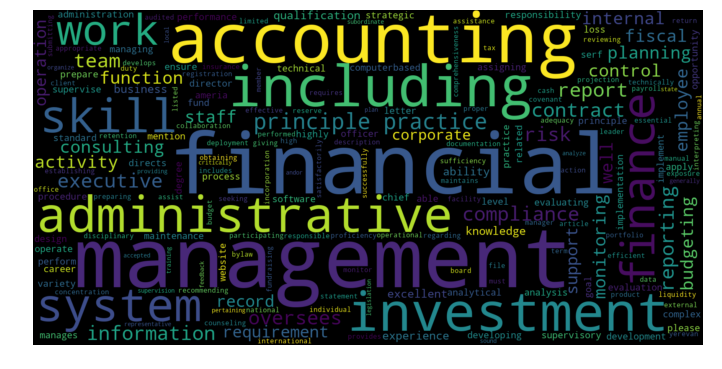

In [153]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(df['token_jobpost'][0])
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Classification

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X = df.token_jobpost
y = df.IT

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=123)

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [160]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df.token_jobpost)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

print(Tfidf_vect.vocabulary_)

{'ameria': 1174, 'investment': 14063, 'consulting': 5702, 'chief': 4565, 'financial': 10251, 'officer': 18800, 'yerevan': 29725, 'description': 7216, 'seeking': 24021, 'manages': 16240, 'fiscal': 10345, 'administrative': 534, 'function': 10972, 'provides': 21560, 'highly': 12246, 'responsible': 22926, 'technically': 26569, 'complex': 5337, 'staff': 25396, 'assistance': 2277, 'executive': 9580, 'director': 7614, 'work': 29444, 'performed': 19958, 'requires': 22790, 'high': 12210, 'level': 15442, 'technical': 26561, 'proficiency': 21289, 'management': 16178, 'well': 29174, 'supervisory': 26054, 'skill': 24739, 'responsibility': 22923, 'supervises': 26044, 'including': 13235, 'assigning': 2266, 'reviewing': 23069, 'employee': 8777, 'process': 21196, 'product': 21239, 'counseling': 6091, 'giving': 11395, 'performance': 19948, 'evaluation': 9429, 'recommending': 22221, 'disciplinary': 7667, 'action': 358, 'serf': 24253, 'member': 16759, 'team': 26518, 'participating': 19652, 'strategic': 25

#### Models

SVM

In [178]:
from sklearn import svm
from sklearn import metrics
from sklearn import naive_bayes
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
svc  = svm.SVC()
svc.fit(Train_X_Tfidf,y_train)

predictions_SVC = svc.predict(Test_X_Tfidf)
predictions_SVC_train = Naive.predict(Train_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Confusion matrix:")
print(confusion_matrix(y_true=y_test, y_pred=predictions_SVC))

print("")
print("The accuracy score for test prediction is : {}".format(metrics.accuracy_score(predictions_SVC, y_test)))
print("The precision score for test prediction is : {}".format(metrics.precision_score(predictions_SVC, y_test)))
print("The f1_score for test prediction is : {}".format(metrics.f1_score(predictions_SVC, y_test)))
print("")

print("")
print("The accuracy score for train prediction is : {}".format(metrics.accuracy_score(predictions_SVC_train, y_train)))
print("The precision score for train prediction is : {}".format(metrics.precision_score(predictions_SVC_train, y_train)))
print("The f1_score for train prediction is : {}".format(metrics.f1_score(predictions_SVC_train, y_train)))
print("")

Confusion matrix:
[[4505    0]
 [1163    0]]

The accuracy score for test prediction is : 0.7948129851799577
The precision score for test prediction is : 0.0
The f1_score for test prediction is : 0.0


The accuracy score for train prediction is : 0.9212794918330308
The precision score for train prediction is : 0.6928433268858801
The f1_score for train prediction is : 0.7748215444516549



C:\Users\arundev.satheesan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [188]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_NB_train = Naive.predict(Train_X_Tfidf)
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Confusion matrix:")
print(confusion_matrix(y_true=y_test, y_pred=predictions_NB))

print("")
print("The accuracy score for test prediction is : {}".format(metrics.accuracy_score(predictions_NB, y_test)))
print("The precision score for test prediction is : {}".format(metrics.precision_score(predictions_NB, y_test)))
print("The f1_score for test prediction is : {}".format(metrics.f1_score(predictions_NB, y_test)))
print("")

print("")
print("The accuracy score for train prediction is : {}".format(metrics.accuracy_score(predictions_NB_train, y_train)))
print("The precision score for train prediction is : {}".format(metrics.precision_score(predictions_NB_train, y_train)))
print("The f1_score for train prediction is : {}".format(metrics.f1_score(predictions_NB_train, y_train)))
print("")

Confusion matrix:
[[4402  103]
 [ 379  784]]

The accuracy score for test prediction is : 0.9149611856033875
The precision score for test prediction is : 0.6741186586414445
The f1_score for test prediction is : 0.7648780487804877


The accuracy score for train prediction is : 0.9212794918330308
The precision score for train prediction is : 0.6928433268858801
The f1_score for train prediction is : 0.7748215444516549



In [189]:
from sklearn.linear_model import LogisticRegression

In [190]:
logit = LogisticRegression()
logit.fit(Train_X_Tfidf,y_train)
predictions = logit.predict(Test_X_Tfidf)
prediction_train = logit.predict(Train_X_Tfidf)
print("Confusion matrix:")
print(confusion_matrix(y_true=y_test, y_pred=predictions))

print("")
print("The accuracy score for train prediction is : {}".format(metrics.accuracy_score(prediction_train, y_train)))
print("The precision score for train prediction is : {}".format(metrics.precision_score(prediction_train, y_train)))
print("The f1_score for train prediction is : {}".format(metrics.f1_score(prediction_train, y_train)))
print("")

print("The accuracy score for test prediction is : {}".format(metrics.accuracy_score(predictions, y_test)))
print("The precision score for test prediction is : {}".format(metrics.precision_score(predictions, y_test)))
print("The f1_score for test prediction is : {}".format(metrics.f1_score(predictions, y_test)))

Confusion matrix:
[[4420   85]
 [ 272  891]]

The accuracy score for train prediction is : 0.9510738052026618
The precision score for train prediction is : 0.8154738878143133
The f1_score for train prediction is : 0.8669545548015628

The accuracy score for test prediction is : 0.9370148200423429
The precision score for test prediction is : 0.766122098022356
The f1_score for test prediction is : 0.8330995792426367


Unsupervised learning

In [191]:
df.columns

Index(['jobpost', 'Title', 'JobRequirment', 'JobDescription', 'RequiredQual',
       'AboutC', 'IT', 'Year', 'token_jobpost'],
      dtype='object')

In [194]:
df['token_RequiredQual'] = df['RequiredQual'].apply(lambda x: nltk.tokenize.WhitespaceTokenizer().tokenize(x))
df['token_RequiredQual'].head()

0    [perform, job, successfully, individual, must,...
1    [bachelors, degree, masters, preferred, excell...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: token_RequiredQual, dtype: object

In [195]:
df['token_RequiredQual'] = df['token_RequiredQual'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df['token_RequiredQual'].head()

0    [perform, job, successfully, individual, must,...
1    [bachelor, degree, master, preferred, excellen...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: token_RequiredQual, dtype: object

In [196]:
df['token_RequiredQual'] = df['token_RequiredQual'].apply(lambda x: [y for y in x if y not in new_stopwords])
df['token_RequiredQual'] = df['token_RequiredQual'].apply(lambda x: ' '.join(x))
df['token_RequiredQual'].head()

0    perform successfully individual must able perf...
1    bachelor degree master preferred excellent ski...
2    degree environmentally related field year rele...
3    advanced degree public health social science c...
4    university degree economical background plus e...
Name: token_RequiredQual, dtype: object

In [228]:
Tfidf_vect = TfidfVectorizer(max_df=0.7,min_df=3)
Tfidf_vect.fit(df.token_RequiredQual)
Tfidf_RequiredQual = Tfidf_vect.transform(df.token_RequiredQual)

In [279]:
len(Tfidf_vect.get_feature_names())

6078

In [229]:
Tfidf_RequiredQual.shape

(18892, 6078)

In [223]:
from sklearn.decomposition import TruncatedSVD

In [238]:
Tsvd = TruncatedSVD(n_components=1500)
reduced_data = Tsvd.fit_transform(Tfidf_RequiredQual)

In [286]:
feature_names = Tfidf_vect.get_feature_names()

In [289]:
best_features = [feature_names[i] for i in Tsvd.components_[0].argsort()[::-1]]
best_features = best_features[:1500]

In [293]:
Tsvd.components_[1]

array([-0.00176037, -0.00024692,  0.09802235, ...,  0.00048315,
        0.00053342,  0.00014655])

In [240]:
print(TsvdFit.explained_variance_ratio_.sum())

0.8860188553219124


In [264]:
TsvdFit.get_params

<bound method BaseEstimator.get_params of TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=None, tol=0.0)>

In [236]:
from sklearn.cluster import KMeans

In [242]:
# calculate SC for K=4 through K=10
k_range = range(4, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(reduced_data)
    scores.append(metrics.silhouette_score(reduced_data, km.labels_))

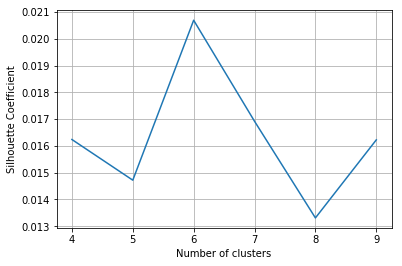

In [243]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Clearly, at K=6, SC is the highest

Final K-Means model with K=6

In [244]:
kmodel = KMeans(n_clusters=6, random_state=123)
kmodel.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Examining top words in each cluster

In [247]:
prediction = kmodel.predict(reduced_data)

In [290]:
common_words = kmodel.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(best_features[word] for word in centroid))

0 : work, good, least, related, technical, finance, working, desirable, personality, banking
1 : work, russian, ability, team, communication, strong, education, accounting, pressure, management
2 : work, strong, field, excellent, russian, degree, year, computer, good, team
3 : ability, work, good, excellent, field, computer, related, finance, least, communication
4 : work, excellent, communication, good, education, year, relevant, plus, least, fluency
5 : plus, strong, communication, work, degree, computer, university, development, system, marketing
